In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import savetxt

In [2]:
%matplotlib inline

In [3]:
training_set = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']

<AxesSubplot:>

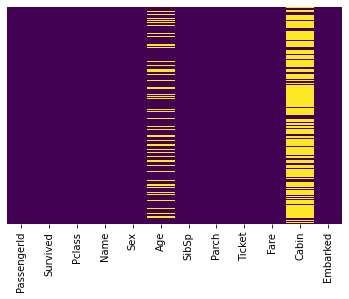

In [4]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [5]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

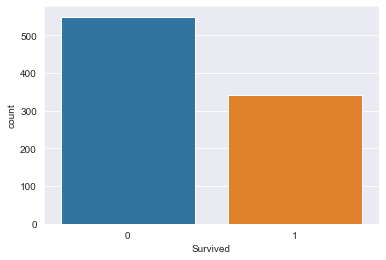

In [6]:
sns.countplot(x='Survived' , data = training_set) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

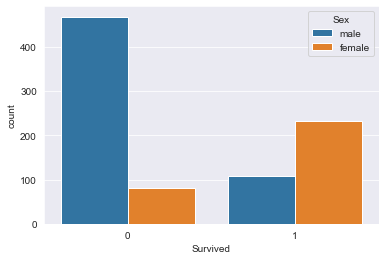

In [7]:
sns.countplot(x='Survived' , data = training_set, hue = 'Sex') 

<AxesSubplot:xlabel='Survived', ylabel='count'>

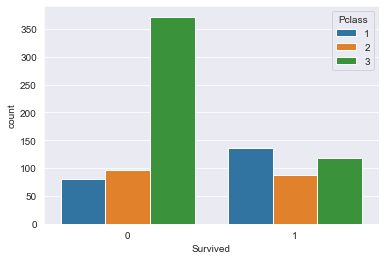

In [8]:
sns.countplot(x='Survived' , data = training_set, hue = 'Pclass') 

<AxesSubplot:xlabel='Age', ylabel='Count'>

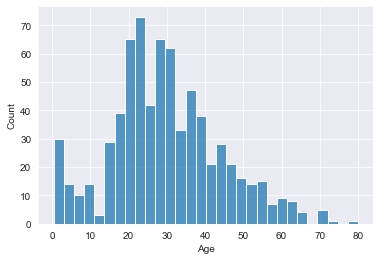

In [9]:
sns.histplot(training_set['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:ylabel='Frequency'>

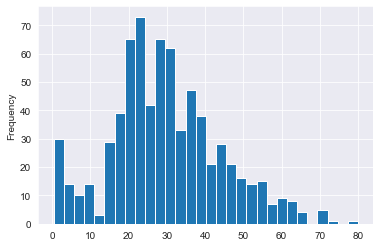

In [10]:
training_set['Age'].plot.hist(bins = 30)

In [11]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

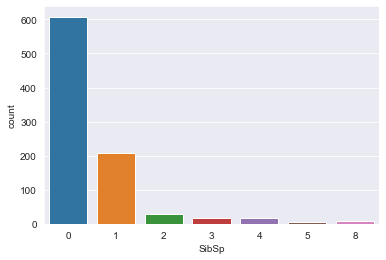

In [12]:
sns.countplot(x = 'SibSp', data = training_set)

<AxesSubplot:>

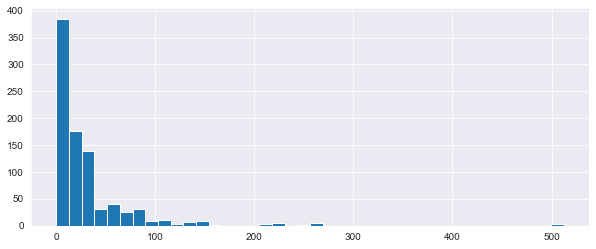

In [13]:
training_set['Fare'].hist(bins = 40, figsize = (10, 4))

# Подготовка данных

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

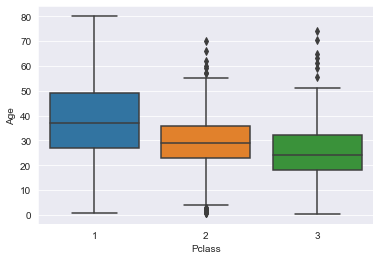

In [14]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

In [15]:
#ввод данных в пустые клетки
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

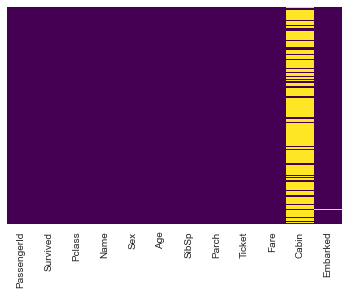

In [17]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap = 'viridis' )

In [18]:
training_set.drop('Cabin', axis = 1, inplace = True)

In [19]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
training_set.dropna(inplace=True)

In [21]:
sex = pd.get_dummies(training_set['Sex'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
embark = pd.get_dummies(training_set['Embarked'], drop_first = True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [23]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
training_set = pd.concat([training_set, sex, embark], axis = 1)

In [25]:
training_set.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [26]:
# training_set.drop(['PassengerId'], axis = 1, inplace = True)

In [27]:
training_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Работа с моделью

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [55]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [56]:
test.drop(['Pclass','Name','Ticket','Cabin'], axis = 1, inplace = True)
test

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,male,34.5,0,0,7.8292,Q
1,893,female,47.0,1,0,7.0000,S
2,894,male,62.0,0,0,9.6875,Q
3,895,male,27.0,0,0,8.6625,S
4,896,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,1305,male,24.0,0,0,8.0500,S
414,1306,female,39.0,0,0,108.9000,C
415,1307,male,38.5,0,0,7.2500,S
416,1308,male,24.0,0,0,8.0500,S


In [57]:
sex1 = pd.get_dummies(test['Sex'], drop_first = True)
sex1.head()

,male
0,1
1,0
2,1
3,1
4,0


In [58]:
embark1 = pd.get_dummies(test['Embarked'], drop_first = True)
embark1

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [59]:
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [60]:
test = pd.concat([test, sex1, embark1], axis = 1)

In [61]:
test

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S
0,892,34.5,0,0,7.8292,1,1,0
1,893,47.0,1,0,7.0000,0,0,1
2,894,62.0,0,0,9.6875,1,1,0
3,895,27.0,0,0,8.6625,1,0,1
4,896,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,1305,24.0,0,0,8.0500,1,0,1
414,1306,39.0,0,0,108.9000,0,0,0
415,1307,38.5,0,0,7.2500,1,0,1
416,1308,24.0,0,0,8.0500,1,0,1


In [62]:
dff = training_set.drop('Pclass', axis = 1)
dff

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,0,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [63]:
test['PassengerId'] = test['PassengerId'].astype(int)
test['Age'] = test['Age'].astype(int)
test

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S
0,892,34,0,0,7.8292,1,1,0
1,893,47,1,0,7.0000,0,0,1
2,894,62,0,0,9.6875,1,1,0
3,895,27,0,0,8.6625,1,0,1
4,896,22,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,1305,24,0,0,8.0500,1,0,1
414,1306,39,0,0,108.9000,0,0,0
415,1307,38,0,0,7.2500,1,0,1
416,1308,24,0,0,8.0500,1,0,1


In [64]:
X = dff.drop('Survived', axis = 1)
y = dff['Survived']

In [65]:
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.2, random_state=333)

In [66]:
clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X, y)

In [67]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8033707865168539

In [68]:
test = test.fillna(test.mean())

In [69]:
test.isna().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [70]:
from sklearn.metrics import classification_report #показывает все показатели нашей модели
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       111
           1       0.78      0.67      0.72        67

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [71]:
submission_preds = clf.predict(test)
df = pd.DataFrame({'PassengerId':test.PassengerId,
                  'Survived':submission_preds})

In [72]:
df.to_csv('submission.csv', index=False)